## Introduction
#### Time Series is am important form of structured data in different fields. eg - finance, economics, physics, etc.
#### Anything observed or measured at many points in time forms a time series.
#### Many Time Series are 'fixed frequency' i.e. data points occur at regular intervals.
#### It can also be 'irregular' i.e without a fixed unit of time or offset between units.
#### There are different ways to mark and refer time series, some of which are:
####     1. Timestamps - specific instants of time
####     2. Fixed periods - months (eg - Jan 2017) or full year (eg - 2010)
####     3. Intervals of Time - defined by start and end timestamp. Fixed Periods can be thought of as special cases of Intervals.
####     4. Experiment or elapsed time - Each timestamp is a measure of time relative to a particular start time.
#### pandas has many nuilt-in tools and algorithms for time series. They help to easily dice, aggregate and resample time-series.
#### TIP - pandas also supports indexes based on 'time deltas', which are useful for representing experiment or elapsed time.

## Date and Time Data Types and Tools
#### The Python standard library has data types for date and time data and calendar-related functionality. The modules 'datetime', 'time' and 'calendar' are main modules.
#### 'datetime' stores both date and time down to microsecond. 'timedelta' represents temporal difference between 2 datetime objects.
#### You can add or subtract 'timedelta' or its multiple to a datetime object to get a shifted object.

In [1]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2018, 8, 24, 14, 54, 13, 736240)

In [2]:
now.year, now.month, now.day

(2018, 8, 24)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [4]:
delta.days

926

In [5]:
delta.seconds

56700

In [6]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime
#### You can format datetime objects and pandas' Timestamp objects as strings using 'str' or 'strftime' passing the format specification.
#### You can use the same format codes to convert strings to dates using 'datetime.strptime'.

In [8]:
stamp = datetime(2011, 1, 3)

str(stamp)

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [10]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

#### 'datetime.strptime' is a good way to parse date with known format. But it can be a bit annoying to write a format each time.
#### In this case, you can use 'parser.parse' from third-party 'dateutil' package. It is capable of parsing most human-intelligible date representations.
#### Eg - day appearing before month in dates outside USA is common, for which we can use 'dayfirst=True'.

In [12]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 13, 1997 10:45 PM')

datetime.datetime(1997, 1, 13, 22, 45)

In [14]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

#### pandas is oriented towards working with arrays of dates either as index or a column in a DataFrame.
#### The 'to_datetime' method parses different kinds of date representations. Standard formats (eg - ISO 8601) can be parsed quickly.
#### It is also able to handle values that should be considered missing. (eg - none, empty string, etc.)
#### datetime objects have number of locale-specific formatting options for systems in other countries or languages. eg - abbreviated month names are different in German and French systems.
#### NOTE - NaT (Not a Time) is pandas' null value for timestamp data.
#### CAUTION - dateutil.parser is useful but imperfect tool. It may even recognize some strings as dates. eg - '42' as year 2042.

In [15]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx[2]

NaT

In [18]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics
#### The most basic time series object in pandas is a Series indexed by timestamps. It is represented external to pandas as Python strings or datetime objects.
#### Under the hood, datetime objects are put in DatetimeIndex.
#### Like other Series, arithematic operations between differently indexed time series automatically align on the dates.

In [19]:
import numpy as np

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.620602
2011-01-05    0.654620
2011-01-07    0.669635
2011-01-08   -0.541739
2011-01-10   -0.434964
2011-01-12    0.054170
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
ts + ts[::2]

2011-01-02   -1.241204
2011-01-05         NaN
2011-01-07    1.339270
2011-01-08         NaN
2011-01-10   -0.869929
2011-01-12         NaN
dtype: float64

#### pandas stores timestamps using NumPy's 'datetime64' data type at nanosecond resolution.
#### Scalar values from 'DatetimeIndex' are pandas 'Timestamp' objects. A 'Timestamp' can be substituted anywhere you would use a 'datetime' object.
#### It can store frequency information and understands time zone conversions and other manipulations.

In [22]:
ts.index.dtype

dtype('<M8[ns]')

In [23]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting
#### Time Series behaves like any other pandas.Series when indexing and selecting based on label.
#### Conveniently, you can pass a string that is interpretable as a date as index.
#### For longer time series, to get easy slices od data, you can pass only a year or year and month.
#### You can also slice using 'datetime' objects.
#### Because most time series data are ordered chronologically, you can slice with timestanps not present in the series to perform range query. You can also pass string, datetime or timestamp for this indexing.
#### Slicing in this manner produces views on the source like slicing NumPy arrays. No data is copied and modificatiosn will be reflected in original data.

In [24]:
stamp = ts.index[2]
ts[stamp]

0.6696347769484791

In [25]:
ts['1/10/2011']

-0.43496431723264006

In [26]:
ts['20110110']

-0.43496431723264006

In [27]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01   -1.327905
2000-01-02    0.389855
2000-01-03    0.038276
2000-01-04   -1.225384
2000-01-05    0.704407
2000-01-06    0.200485
2000-01-07    0.280085
2000-01-08    0.314965
2000-01-09   -0.241732
2000-01-10    0.631419
Freq: D, dtype: float64

In [28]:
longer_ts['2001']

2001-01-01    1.581130
2001-01-02    0.167098
2001-01-03   -0.816911
2001-01-04    0.302942
2001-01-05    0.968706
2001-01-06    0.779146
2001-01-07   -1.523483
2001-01-08   -0.724681
2001-01-09   -0.178921
2001-01-10    0.557737
2001-01-11   -0.173565
2001-01-12    0.651159
2001-01-13   -2.503144
2001-01-14    0.178297
2001-01-15    0.488626
2001-01-16    0.653233
2001-01-17    0.334088
2001-01-18    0.249476
2001-01-19    0.476417
2001-01-20   -0.720533
2001-01-21   -0.960502
2001-01-22   -0.403528
2001-01-23   -0.424601
2001-01-24   -0.015189
2001-01-25   -1.586064
2001-01-26    0.206113
2001-01-27   -2.213696
2001-01-28    0.246418
2001-01-29    1.175788
2001-01-30   -0.839724
                ...   
2001-12-02   -0.908207
2001-12-03   -0.113172
2001-12-04   -0.583514
2001-12-05    1.007903
2001-12-06    1.234086
2001-12-07   -0.882931
2001-12-08   -1.046718
2001-12-09   -0.726555
2001-12-10   -1.761837
2001-12-11    0.819854
2001-12-12    0.279015
2001-12-13   -0.457892
2001-12-14 

In [29]:
longer_ts['2001-05']

2001-05-01   -0.578289
2001-05-02    0.514882
2001-05-03   -2.813481
2001-05-04   -0.013797
2001-05-05   -0.930187
2001-05-06   -0.026023
2001-05-07    0.684279
2001-05-08    0.927434
2001-05-09    1.185822
2001-05-10    0.739293
2001-05-11   -2.481568
2001-05-12    0.385364
2001-05-13    0.812606
2001-05-14   -0.636680
2001-05-15    0.462309
2001-05-16    0.480784
2001-05-17   -1.428652
2001-05-18   -0.454706
2001-05-19    1.627808
2001-05-20   -0.334482
2001-05-21   -0.603552
2001-05-22    1.918634
2001-05-23   -1.425140
2001-05-24   -0.195504
2001-05-25    0.525058
2001-05-26    1.181563
2001-05-27   -0.891890
2001-05-28   -2.671364
2001-05-29    0.875528
2001-05-30   -0.788606
2001-05-31    0.893880
Freq: D, dtype: float64

In [30]:
ts[datetime(2011, 1, 7)]

0.6696347769484791

In [31]:
ts

2011-01-02   -0.620602
2011-01-05    0.654620
2011-01-07    0.669635
2011-01-08   -0.541739
2011-01-10   -0.434964
2011-01-12    0.054170
dtype: float64

In [32]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.669635
2011-01-08   -0.541739
2011-01-10   -0.434964
dtype: float64

#### There is an equivalent method for instance as well called 'truncate', which slices Series between two dates.
#### All of the above holds true for DataFrame as well, based on indexing on its rows.

In [33]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.620602
2011-01-05    0.654620
2011-01-07    0.669635
2011-01-08   -0.541739
dtype: float64

In [34]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns = ['Colorado', 'Texas',
                                'New York', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.695881,-1.663806,1.190218,-0.473666
2001-05-09,0.021602,-0.114717,-0.994597,-0.672968
2001-05-16,1.398907,-0.205220,-0.124262,2.283874
2001-05-23,0.431852,-0.253309,-0.319060,0.723475
2001-05-30,-0.847489,0.285182,0.186877,1.487554


### Time Series with Duplicate Indices
#### In some scenarios, you may have multiple data observations falling on particular timestamp. You can determine if the index is not unique by using 'is_unique' property.
#### Indexing in such a time series will either produce scalar values or slices, depending on condition that timestamp is duplicated or not.
#### A way to aggregate on non-unique timestamps is to use 'groupby' and pass 'level=0'.

In [35]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                         '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [36]:
dup_ts.index.is_unique

False

In [37]:
dup_ts['1/3/2000']

4

In [38]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [39]:
grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [40]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting
#### Generic time series in pandas are assumed to be irregular i.e. no fixed frequency.
#### Sometimes, it is necessary to work with relatively fixed frequency, even if it means introducing missing values in the series.
#### pndas has full suite of standard time series frequencies and tools for resampling, interferring frequencies, and generating fixed-frequency date ranges. eg - You can convert sample time series into fixd daily frequency using 'resample'. Using string 'D' for 'daily frequency'.

In [41]:
ts

2011-01-02   -0.620602
2011-01-05    0.654620
2011-01-07    0.669635
2011-01-08   -0.541739
2011-01-10   -0.434964
2011-01-12    0.054170
dtype: float64

In [42]:
resampler = ts.resample('D')

In [43]:
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating Date Ranges
#### 'pandas.date_range' is responsible for generating 'DatetimeIndex' with indicated length based on particulare frequency.
#### By default, it generates daily timestamps. If you only pass either start or end date, you must also pass number of periods as well. 
#### The start and end dates define strict boundaries for generated date index.
#### Eg - to get last business day each month, you would pass 'BM' frequency.
#### By default, date_range preserves the time of the start or end timestamp.
#### You can even create set of timestamps normalized to midnight using the 'normalize' option.

In [44]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [45]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range(start='2012-06-01', periods=20)

DatetimeIndex(['2012-06-01', '2012-06-02', '2012-06-03', '2012-06-04',
               '2012-06-05', '2012-06-06', '2012-06-07', '2012-06-08',
               '2012-06-09', '2012-06-10', '2012-06-11', '2012-06-12',
               '2012-06-13', '2012-06-14', '2012-06-15', '2012-06-16',
               '2012-06-17', '2012-06-18', '2012-06-19', '2012-06-20'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [48]:
# Timestamp of 12:56:31 preserved
pd.date_range('2012-05-02 12:56:31', periods=5) 

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [49]:
# Timestamp normalized to midnight i.e. 12:56:31 removed
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) 

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets
#### Frequencies in pandas are composed of 'base frequency' and 'multiplier'. Base frequencies are typicall referred by string alias. eg - 'M' for monthly, 'H' for hourly.
#### For each base frequency, there is a defined object called 'date offset'. eg - hourly can be represented with Hour class.
#### You can define a multiple of an offset by passing an integer.
#### You never need to explicitly need to create any of the objects. Instead just use string alias. eg - '4H', 'H'. Putting an integer before base frequency creates a multiple.

In [50]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [51]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [52]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

#### Offsets can be combined together by addition.
#### Rather than passing specific code for frequency, you can pass strings (eg- '1h30min') that will be parsed to the same expression.
#### Some frequencies describe data points not evenly spaced (eg - 'M', 'BM' i.e. last business day of the month). These depend on number of days, whether month ends on wekend or not, etc. These are called as 'anchored offsets'.
#### NOTE - Users can define their own custom frequency classes to make up for any date logic not available in pandas.

In [53]:
Hour(2) + Minute(30)

<150 * Minutes>

In [54]:
pd.date_range('2001-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 01:30:00',
               '2001-01-01 03:00:00', '2001-01-01 04:30:00',
               '2001-01-01 06:00:00', '2001-01-01 07:30:00',
               '2001-01-01 09:00:00', '2001-01-01 10:30:00',
               '2001-01-01 12:00:00', '2001-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Shifting (Leading and Lagging) Data
#### "Shifting" refers to moving data backward and forward through time. Bot Series and DataFrame have 'shift' method for naive shifts, leaving the index unmodified.
#### When we shift, missing data is introduced either at start or end of the series.
#### Common use of shift is computing percent changes in time series or multiple time series as DataFrame columns.

In [55]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.465225
2000-02-29   -0.248406
2000-03-31   -0.224189
2000-04-30   -1.282125
Freq: M, dtype: float64

In [56]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.465225
2000-04-30   -0.248406
Freq: M, dtype: float64

In [57]:
ts.shift(-2)

2000-01-31   -0.224189
2000-02-29   -1.282125
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [58]:
ts / ts.shift(1) -1

2000-01-31         NaN
2000-02-29   -1.169534
2000-03-31   -0.097492
2000-04-30    4.718958
Freq: M, dtype: float64

#### Because naive shifts leave index unmodified, some data is discarded. But if the frequency is known, it can be passed to shift to advance the timestamps instead of just the data.
#### Different frequencies can be passed, giving some flexibility on how to lead and lag the data. eg - 'T' for minutes.

In [59]:
ts.shift(3, freq='D')

2000-02-03    1.465225
2000-03-03   -0.248406
2000-04-03   -0.224189
2000-05-03   -1.282125
dtype: float64

In [60]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.465225
2000-02-29 01:30:00   -0.248406
2000-03-31 01:30:00   -0.224189
2000-04-30 01:30:00   -1.282125
Freq: M, dtype: float64

### Shifting Dates with Offsets
#### The pandas date offsets can also be used with 'datetime' or 'Timestamp' objects.
#### If you add anchored offset (eg - 'MonthEnd'), the first increment will 'roll forward' a date to the next date based on the frequency rule.

In [61]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [62]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [63]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

#### Anchored offsets can explicitly 'roll' dates forward or backward using 'rollforward' and 'rollback' methods.
#### One creative use of offsets is to use them with 'groupby'. It groups based on the offset like month end and calculates aggregate value. But the effects can be much easily be implemented using 'resample'.

In [64]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [65]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [66]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

ts

2000-01-15   -1.051516
2000-01-19   -0.384949
2000-01-23   -0.710871
2000-01-27   -1.063647
2000-01-31    1.510837
2000-02-04    0.891960
2000-02-08    0.182105
2000-02-12   -0.447514
2000-02-16    1.149756
2000-02-20    0.037801
2000-02-24   -0.000932
2000-02-28    0.160582
2000-03-03    0.433708
2000-03-07   -0.354192
2000-03-11   -0.734012
2000-03-15   -0.222640
2000-03-19   -0.189905
2000-03-23    0.856604
2000-03-27    0.543988
2000-03-31   -0.431523
Freq: 4D, dtype: float64

In [67]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.340029
2000-02-29    0.281965
2000-03-31   -0.012246
dtype: float64

In [68]:
ts.resample('M').mean()

2000-01-31   -0.340029
2000-02-29    0.281965
2000-03-31   -0.012246
Freq: M, dtype: float64

## Time Zone Handling
#### Working with time zones is considered one of the most unpleasant parts of time series manipulation.
#### Hence many users choose to work in 'coordinated universal time' or 'UTC' which is the current International Standard.
#### In Python, time zone info comes from third-party 'pytz' library. It exposes the 'Olson database', which is a compilation of world time zone information.
#### This is more important for historical data because the 'daylight saving time (DST)' transition dates have been changed numerous times.
#### pandas wraps pytz's functionality so you can ignore its API outside of time zone names, which can be found interactively in the docs.
#### To get time zone object from pytz, use 'pytz.timezone'.

In [70]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [71]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion
#### By default, time series in pandas are 'time zone naive' i.e. the 'tz' field is None.
#### We can create date ranges with a set time zone. But conversion from naive to localizeed is handled by 'tz_localize'.
#### We can even convert time zones of the time series. eg - EST to UTC
#### DateTimeIndex also has the same instance methods like 'tz_localize' and 'tz_convert'.
#### CAUTION - Localizing naive timestamps also checks for ambiguous or non-existent times around daylight saving time transitions.

In [73]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-09 09:30:00   -0.447691
2012-03-10 09:30:00    0.568457
2012-03-11 09:30:00   -0.789614
2012-03-12 09:30:00    1.585550
2012-03-13 09:30:00    1.125298
2012-03-14 09:30:00    0.915889
Freq: D, dtype: float64

In [74]:
print(ts.index.tz)

None


In [75]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [76]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.447691
2012-03-10 09:30:00+00:00    0.568457
2012-03-11 09:30:00+00:00   -0.789614
2012-03-12 09:30:00+00:00    1.585550
2012-03-13 09:30:00+00:00    1.125298
2012-03-14 09:30:00+00:00    0.915889
Freq: D, dtype: float64

In [77]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [78]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.447691
2012-03-10 04:30:00-05:00    0.568457
2012-03-11 05:30:00-04:00   -0.789614
2012-03-12 05:30:00-04:00    1.585550
2012-03-13 05:30:00-04:00    1.125298
2012-03-14 05:30:00-04:00    0.915889
Freq: D, dtype: float64

In [79]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.447691
2012-03-10 14:30:00+00:00    0.568457
2012-03-11 13:30:00+00:00   -0.789614
2012-03-12 13:30:00+00:00    1.585550
2012-03-13 13:30:00+00:00    1.125298
2012-03-14 13:30:00+00:00    0.915889
Freq: D, dtype: float64

In [80]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.447691
2012-03-10 15:30:00+01:00    0.568457
2012-03-11 14:30:00+01:00   -0.789614
2012-03-12 14:30:00+01:00    1.585550
2012-03-13 14:30:00+01:00    1.125298
2012-03-14 14:30:00+01:00    0.915889
Freq: D, dtype: float64

In [81]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone - Aware Timestamp Objects
#### Similar to time-series and date ranges, Timestamp objects can also be localized from naive to time zone-aware and converted from one zone to another.
#### We can also pass a time zone when creating a Timestamp. They internally store UTC timestamp value as nanoseconds since the Unix ecpoch (January 1, 1970). This UTC value is invariant between time zone conversions.

In [83]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [84]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [85]:
stamp_utc.value

1299902400000000000

In [86]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

#### When doing time arithematic with pandas's 'DateOffset' objects, it respects daylight saving time transitions where possible.
#### We can check this by using Timestamps taken 30 minutes before and 90 minutes after Daylight Savings Time.

In [88]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [89]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [90]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [91]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones
#### If we combine 2 time series from different time zones, the result will be UTC.
#### Since timestamps are stored as UTC under the hood, the operation is straightforward and requires no conversion.

In [94]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.747242
2012-03-08 09:30:00    1.119408
2012-03-09 09:30:00    1.822876
2012-03-12 09:30:00   -0.404489
2012-03-13 09:30:00    1.347233
2012-03-14 09:30:00   -0.524334
2012-03-15 09:30:00   -0.229219
2012-03-16 09:30:00    0.167957
2012-03-19 09:30:00    1.282066
2012-03-20 09:30:00    0.512213
Freq: B, dtype: float64

In [96]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### Periods and Period Arithemetic
#### Periods represent timespans. eg - days, months, quarters, years, etc.
#### The 'Period' class represents this data type, needing a string or integers and a frequency.
#### Adding or subtracting integers from periods has the effect of shifting by their frequency.
#### If 2 periods have same frequency, their difference is number of units between them. eg - days, montds, years, etc.

In [98]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [99]:
p + 5

Period('2012', 'A-DEC')

In [100]:
p - 2

Period('2005', 'A-DEC')

In [102]:
pd.Period('2014', freq='A-DEC') - p

7

#### Regular ranges of periods can be constructed using the 'period_range' function.
#### The 'PeriodIndex' class stores sequence of periods and can serve as an axis index in any pandas data structure.
#### We can also use an array of strings with this class.

In [106]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [107]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.328395
2000-02   -0.131419
2000-03    0.914989
2000-04    0.111193
2000-05    0.171494
2000-06    1.002652
Freq: M, dtype: float64

In [108]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion
#### Periods and PeriodIndex objects can be converted to other frequencies with 'asfreq' method. eg - annual to monthly period.
#### You can think of a period as a cursor pointing to a span of time, subdivided by its defined sub-periods.
#### When converting from high to lower frequency, pandas determines superperiod depending on where the subperiod "belongs". eg - for 'A-JUN' frequency, 'Aug-2007' will belong to 2008 period.

In [110]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [111]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [112]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [113]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [114]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [115]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [116]:
p = pd.Period('Aug-2007', freq='M')

p.asfreq('A-JUN')

Period('2008', 'A-JUN')

#### Whole PeriodIndex objects or time series can also be converted with same semantics.
#### We can change the frequency to indicate what we want at the end of the period. eg - changing frequency as 'B' for having last business day of each year.

In [118]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.702730
2007    0.825189
2008   -0.391357
2009    0.293876
Freq: A-DEC, dtype: float64

In [119]:
ts.asfreq('M', how='start')

2006-01    0.702730
2007-01    0.825189
2008-01   -0.391357
2009-01    0.293876
Freq: M, dtype: float64

In [120]:
ts.asfreq('B', how='end')

2006-12-29    0.702730
2007-12-31    0.825189
2008-12-31   -0.391357
2009-12-31    0.293876
Freq: B, dtype: float64

### Quarterly Period Frequencies
#### Quarterly data is standard in accounting, finance, etc. Much of this data is reported relative to a fiscal year end, especially last calendar or business day.
#### Period '2012Q4' has different meaning depending on fiscal year end.
#### pandas supports all 12 possible quarterly frequencies - Q-JAN through Q-DEC.
#### eg - For fiscal year ending in January, 2012Q4 runs from November through January.

In [122]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [123]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [124]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

#### This makes it easy to do period arithematic. eg - getting timestamp at 4 pm on second-to-last business day of the quarter.
#### You can generate quarterly ranges using 'period_range'. Performing arithematic is similar.

In [126]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [127]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [128]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [129]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()

ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)
#### Series and DataFrame objects indexed by timestamps can be converted to periods with 'to_period' method.
#### As periods refer to non-overlapping timespans, one timestamp can belong to only one period for a given frequency. 
#### While frequency in 'PeriodIndex'is inferred from the timestamps by default, you cn specify any frequency you want.
#### Having duplicate periods in the result is also not a problem.
#### To convert back to timestamps, use 'to_timestamp'.

In [131]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)

ts

2000-01-31   -0.411243
2000-02-29    0.043029
2000-03-31   -0.024429
Freq: M, dtype: float64

In [132]:
pts = ts.to_period()

pts

2000-01   -0.411243
2000-02    0.043029
2000-03   -0.024429
Freq: M, dtype: float64

In [133]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)

ts2

2000-01-29   -1.306829
2000-01-30   -0.202568
2000-01-31   -0.041823
2000-02-01    1.010672
2000-02-02    0.316045
2000-02-03   -2.897992
Freq: D, dtype: float64

In [134]:
ts2.to_period('M')

2000-01   -1.306829
2000-01   -0.202568
2000-01   -0.041823
2000-02    1.010672
2000-02    0.316045
2000-02   -2.897992
Freq: M, dtype: float64

In [135]:
pts = ts2.to_period()
pts

2000-01-29   -1.306829
2000-01-30   -0.202568
2000-01-31   -0.041823
2000-02-01    1.010672
2000-02-02    0.316045
2000-02-03   -2.897992
Freq: D, dtype: float64

In [136]:
pts.to_timestamp(how='end')

2000-01-29   -1.306829
2000-01-30   -0.202568
2000-01-31   -0.041823
2000-02-01    1.010672
2000-02-02    0.316045
2000-02-03   -2.897992
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays
#### Fixed frequency datasets sometimes have timespan information spread across multiple columns. eg - macroeconomic dataset has year and uqarter in different columns.
#### By passing these columns as arrays to EpriodIndex with a frequency, we can combine them to form an index for the DataFrame.

In [138]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [139]:
data.year[:5]

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [140]:
data.quarter[:5]

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [142]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                      freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [144]:
data.index=index

data.infl[:10]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
Freq: Q-DEC, Name: infl, dtype: float64

## Resampling and Frequency Conversion
#### Resampling is the process of converting a time series from one frequency to another.
#### Aggregating higher frequency data to lower frequency is called 'downsampling'. Converting lower frequency data to higher frequency is called 'upsampling'.
#### There can be other instances of sampling not falling in these categories. eg - W-WED to W-FRI.
#### pandas objects are equipped with 'resample' method, which is the wrokhorse function for frequency conversion.
#### It has a similar API as 'groupby'. You call 'resample' to group the data and then call an aggregation function.
#### 'resample' is a flexible and high-performance function that can process very large time series.

In [147]:
rng = pd.date_range('2001-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts[:10]

2001-01-01   -0.427644
2001-01-02   -0.377475
2001-01-03   -1.158527
2001-01-04   -0.633258
2001-01-05    0.805478
2001-01-06   -1.078929
2001-01-07    0.265215
2001-01-08   -0.395753
2001-01-09   -0.993741
2001-01-10    3.162702
Freq: D, dtype: float64

In [148]:
ts.resample('M').mean()

2001-01-31   -0.148010
2001-02-28    0.007180
2001-03-31    0.201887
2001-04-30   -0.493140
Freq: M, dtype: float64

In [149]:
ts.resample('M', kind='period').mean()

2001-01   -0.148010
2001-02    0.007180
2001-03    0.201887
2001-04   -0.493140
Freq: M, dtype: float64

### Downsampling
#### Aggregating data to regular, lower frequency is pretty normal task.
#### The data you are aggregating does not need to be fixed frequently, the desired frequency defines 'bin edges' used to slice teh time series into pieces to aggregate.
#### Each interval is said to be half-open, a data point can only be in one interval and a union of intervals must make up whole time frame.
#### There are couple of things to think about before using 'resample' to downsample data:
####     1. Which side of the interval is closed.
####     2. How to label each aggregated bin, either with start of interval or the end.

In [151]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

#### We can aggregate any time series data into chunks or bars of defined frequency and use an aggregate function on them. eg - sum, avg, etc.
#### The frequency you pass defines the bin edges. By default, the 'left' bin edge is inclusive. But passing " closed='right' " changes the interval to be closed on the right.

In [154]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [155]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

#### By default, the series is labeled by timestamps from left side of each bin. You can make it the right edge of the bin by passing " label='right' ".
#### You may sometime want to shift the result by some amount (eg - subtract 1 second from right edge of bin). For this, you can pass a string or date offset to 'loffset'.
#### You can achieve the same effect by calling the 'shift' method.

In [157]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [158]:
ts.resample('5min', closed='right', 
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling:
#### In finance, a popular way to aggregate time series is to compute 4 values for each bucket: first (open), last (close), maximum (high) and minimal (low) values.
####     We can use the 'ohlc' aggregate function to get a DataFrame having columns having the 4 aggregates, which are efficiently computed is a single sweep of the data.

In [160]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation
#### When converting low frequency to higher frequency, we do not need aggergation.
#### When we want to aggregate with only 1 value per group, then missing values result in gaps. We use 'asfreq' method to convert to the higher frequencies without aggregation.
#### Next, we fill the gaps using filling or interpolation methods available like 'ffill', fillna' and 'reindex' which we used for resampling.

In [162]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.352802,0.371774,0.879472,0.19245
2000-01-12,0.349695,0.435194,-0.174149,-0.65500


In [163]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.352802,0.371774,0.879472,0.19245
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.349695,0.435194,-0.174149,-0.65500


In [164]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.352802,0.371774,0.879472,0.19245
2000-01-06,-1.352802,0.371774,0.879472,0.19245
2000-01-07,-1.352802,0.371774,0.879472,0.19245
2000-01-08,-1.352802,0.371774,0.879472,0.19245
2000-01-09,-1.352802,0.371774,0.879472,0.19245
2000-01-10,-1.352802,0.371774,0.879472,0.19245
2000-01-11,-1.352802,0.371774,0.879472,0.19245
2000-01-12,0.349695,0.435194,-0.174149,-0.65500


#### You can similarly choose to only fill certain number of periods to limit how far to conyinue without an observed value.
#### The new date index created need not overlap the old one at all. If we resample back with the same frequency, we will get the original series back.

In [166]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.352802,0.371774,0.879472,0.19245
2000-01-06,-1.352802,0.371774,0.879472,0.19245
2000-01-07,-1.352802,0.371774,0.879472,0.19245
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.349695,0.435194,-0.174149,-0.65500


In [167]:
# Old time series can be attained without overlap.
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.352802,0.371774,0.879472,0.19245
2000-01-13,0.349695,0.435194,-0.174149,-0.65500


### Resampling with Periods
#### Resampling data indexed by periods is similar to timestamps.
#### Upsampling is more nuanced, as you have to make a decision about which end of the timespan in the new frequency to place the values before resampling. Just like 'asfreq' method. 
#### The 'convention' argument defaults to 'start' but you can change it to 'end'.

In [169]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                                         freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.249231,-2.065552,-0.604521,-0.078377
2000-02,-0.987753,-0.318903,0.311977,0.091783
2000-03,0.298468,0.803729,-0.623903,1.369662
2000-04,0.458932,0.406961,-0.276269,1.158306
2000-05,-0.427215,0.140441,0.264665,1.763246


In [170]:
annual_frame = frame.resample('A-DEC').mean()

annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.102447,-0.043813,0.077324,0.562220
2001,0.058988,-0.262638,-0.173303,0.317646


In [171]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.102447,-0.043813,0.077324,0.562220
2000Q2,-0.102447,-0.043813,0.077324,0.562220
2000Q3,-0.102447,-0.043813,0.077324,0.562220
2000Q4,-0.102447,-0.043813,0.077324,0.562220
2001Q1,0.058988,-0.262638,-0.173303,0.317646
2001Q2,0.058988,-0.262638,-0.173303,0.317646
2001Q3,0.058988,-0.262638,-0.173303,0.317646
2001Q4,0.058988,-0.262638,-0.173303,0.317646


In [172]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.102447,-0.043813,0.077324,0.562220
2001Q1,-0.102447,-0.043813,0.077324,0.562220
2001Q2,-0.102447,-0.043813,0.077324,0.562220
2001Q3,-0.102447,-0.043813,0.077324,0.562220
2001Q4,0.058988,-0.262638,-0.173303,0.317646


#### Periods refer to timespans, teh rules about upsampling and downsampling are a more rigid:
####     1. In downsampling, target frequency must be a 'subperiod' of source frequency.
####     2. In upsampling, target frequency must be a 'superperiod' of source frequency.
#### If the above rules are not satisfied , an exception will be raised. This mainly affects quarterly, annual and weekly frequencies.
#### eg - timespans defined by 'Q-MAR' only line up with 'A-MAR', 'A-JUN', 'A-SEP' and 'A-DEC'.

In [174]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.102447,-0.043813,0.077324,0.562220
2001Q1,-0.102447,-0.043813,0.077324,0.562220
2001Q2,-0.102447,-0.043813,0.077324,0.562220
2001Q3,-0.102447,-0.043813,0.077324,0.562220
2001Q4,0.058988,-0.262638,-0.173303,0.317646
2002Q1,0.058988,-0.262638,-0.173303,0.317646
2002Q2,0.058988,-0.262638,-0.173303,0.317646
2002Q3,0.058988,-0.262638,-0.173303,0.317646


## Moving window Functions
#### An important class of array transformations used for time series operations are staistics and other functions evaluated over sliding window or exponentially decaying weights.
#### It can be useful for smoothing noisy or gappy data. We cam call these 'moving window functions' although they also include exponentially weighted moving average.
#### These functions can authomatically exclude missing data like other statistical functions.

In [176]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                          parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()

#### The first method we will look into is the 'rolling' operator, which behaves similarly to 'resample' and 'groupby'.
#### It can be called on a Series and DataFrame with a 'window' with number of periods.
#### Its behavior is similar to 'groupby' but instead of grouping, it creates object that enables grouping over the specified sliding window.
#### By default, it requires all values in the window to be non-NA, but this can be changed to account for missing data, especially if you have fewer data that the window period.

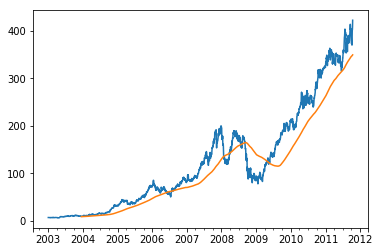

In [180]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [181]:
# We are accounting for minimum of 10 NA values in a window
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

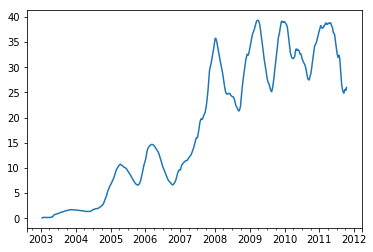

In [182]:
aapl_std250.plot()

#### Another variation to window is expanding window, which starts at the beginning of the series and increases its size until it encompasses the whole series.
#### For this feature we use the 'expanding' operator and then aggregator.

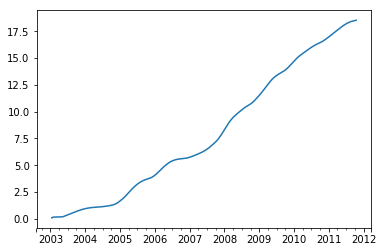

In [185]:
expanding_mean = aapl_std250.expanding().mean()
expanding_mean.plot()

#### Calling a window on a DataFrame applies transformation to each column.
#### The rolling function also accepts a string which indicates a fixed-size time offset, rather than set number of periods.
#### This can be useful for irregular time series. The same strings can be used in 'resample'.

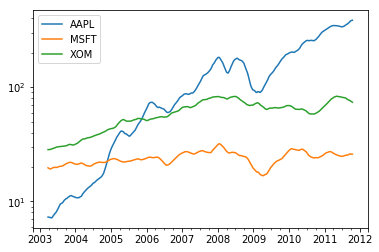

In [190]:
close_px.rolling(60).mean().plot(logy=True)

In [191]:
# Instead of fixed time period, we have a set number of days (20 days) as window
close_px.rolling('20D').mean().head(10)

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### Exponentially weighted functions
#### Alternative to static window size with equally weighted observations is to specify a 'decay factor', giving more weight to recent observations.
#### There are couple of ways to specify decay factor. Most popular one is using 'span'. Its result is comparable to simple moving window with window size equal to span.
#### Because exponentially weighted statistics places more weights on recent observations, it 'adapts' more quickly to changes.
#### pandas has 'ewm' (Exponentially Weighted Moving) operator to go with 'rolling' and 'expanding'.

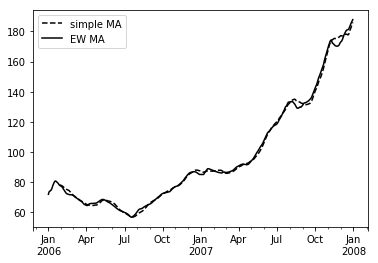

In [194]:
import matplotlib.pyplot as plt

aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()

# Simple Moving Average. changes shown will be slower and inconspicuous.
ma60.plot(style='k--', label='simple MA')

# Expo weighted Moving Average. Changes shown will be quick and pronounced.
ewma60.plot(style='k-', label='EW MA')

plt.legend()

### Binary Moving Window
#### For statistical operations (eg - covariance, correlation), we need to work on 2 time series.
#### To get this, we first compute percent change for our entire time series of interest.
#### The we can call 'corr' aggregation after 'rolling' to get rolling correlation between the two percent changes series.
#### for finding correlation between multiple time series (eg - correlation between S&P 500 with different company stocks), we can write a loop and creating a new DataFrame of correlations. But this might be repetative.
#### So instead we can pass a Series and a DataFrame to 'rolling_corr', which will compute correlation of the Series with each column of the DataFrame.

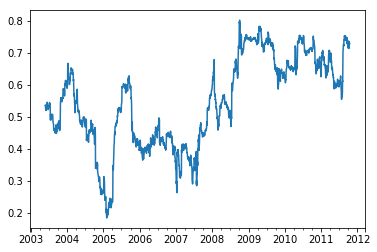

In [196]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

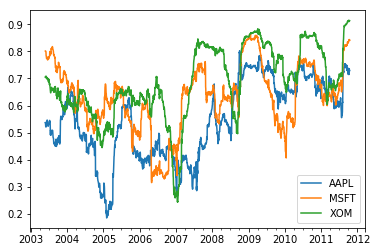

In [198]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions
#### The 'apply' method allows us to implement array functions over a moving window with help of 'rolling'.
#### The only requirement is that the function produce a single value (i.e. reduction) from each piece of the array.
#### eg - Computing sample quantiles using 'rolling().quantile()'.
#### Another requirement may be to get perceentile rank of a particular value over the sample. This is achieved by 'scipy.stats.percentileofscore'.

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


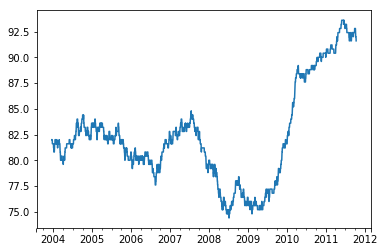

In [200]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)

result.plot()